# Mini Project Group 1

## Retail Transaction

The goal of this project is to find out the insights that exist from the Retail Transaction dataset with Descriptive Analysis.

### Dataset Information

The columns provide information on transactions, customers, products, and purchase behavior, making the data set suitable for various analyses, including shopping cart analysis and customer segmentation. Here's a brief explanation of each column in the Data Set:

- **Transaction_ID**: A unique identifier for each transaction, represented as a 10-digit number. This field is used to uniquely identify each purchase.
- **Date**: The date and time of the transaction. Records the timestamp of each purchase.
- **Customer_Name**: The name of the customer who made the purchase. This provides information about the identity of the customer.
- **Product**: A list of products purchased in the transaction. This list includes the name of the product purchased.
- **Total_Items**: The total number of items purchased in the transaction. The number of products purchased.
- **Total_Cost**: The total cost of the purchase, in currency. This is the financial value of the transaction.
- **Payment_Method**: The method used for payment in the transaction, such as credit card, debit card, cash, or mobile payment.
- **City**: The city where the purchase was made. Indicates the location of the transaction.
- **Store_Type**: The type of store where the purchase was made, such as supermarket, convenience store, department store, etc.
- **Discount_Applied**: A binary indicator (True/False) that indicates whether a discount was applied to the transaction.
- **Customer_Category**: A category that represents the customer's background or age group.
- **Season**: The season when the purchase occurred, such as spring, summer, fall, or winter.
- **Promotion**: The type of promotion applied to the transaction, such as “None”, “BOGO (Buy One Get One Free)”, or “Discount on Specific Items”.


### Overview

This time we will analyze Retail Transaction data descriptively with several ETL process: understanding the dataset, data cleaning, basic data analysis, and exporting the cleaned data. 

### Step 1: Understanding The Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('D:\MYEDUSOLVE\File_Jupyter\Data_Analytics\Data\Retail_Transactions_Dataset.csv')

In [3]:
#check number of rows and colums
df.shape

(1000000, 13)

Retail Transaction data has 1 million rows and 13 columns

In [5]:
# check data summaries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


In [4]:
# check missing value
df.isna().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In this dataset, the only column that has null values is the **Promotion** column, which is **333943** columns and the other columns are free of null values.

In [6]:
# show data
df.head(5)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


### Step 2: Data Cleansing

In [8]:
# Replaces the value True with 1 and False with 0
df['Discount_Applied'] = df['Discount_Applied'].fillna(0).astype(int)

In [9]:
# Rename the 'Date' column to 'Year'
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.year
df.rename(columns={'Date': 'Year'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Year               1000000 non-null  int32  
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  int32  
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(8)
memory usage: 91.6+ MB


Here we change the **Date** column name to **Year** and change the data type to **int64** to facilitate analysis.

In [11]:
df.head(5)

,Transaction_ID,Year,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,1,Homemaker,Winter,NaN
1,1000000001,2023,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,1,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,1,Professional,Winter,NaN
3,1000000003,2020,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,1,Homemaker,Spring,NaN
4,1000000004,2020,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,0,Young Adult,Winter,Discount on Selected Items


In [12]:
# Fill the null value with 'No Promotion'
df['Promotion'] = df['Promotion'].fillna('No Promotion')

In [13]:
df.isna().sum()

Transaction_ID       0
Year                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

We fill the null value in the **Promotion** column with the value **'No Promotion'**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Year               1000000 non-null  int32  
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  int32  
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          1000000 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(8)
memory usage: 91.6+ MB


#### Check outlier

In [15]:
# separates data of object type
df_num = df.select_dtypes(exclude='object')

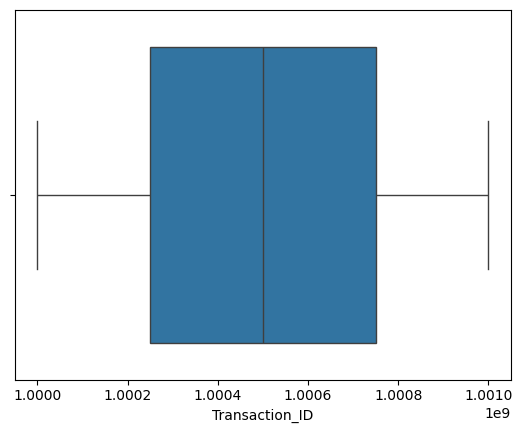

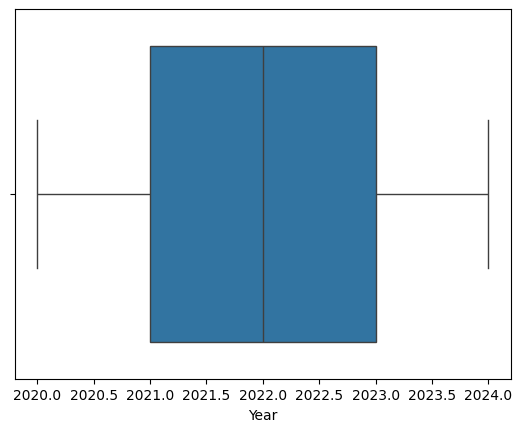

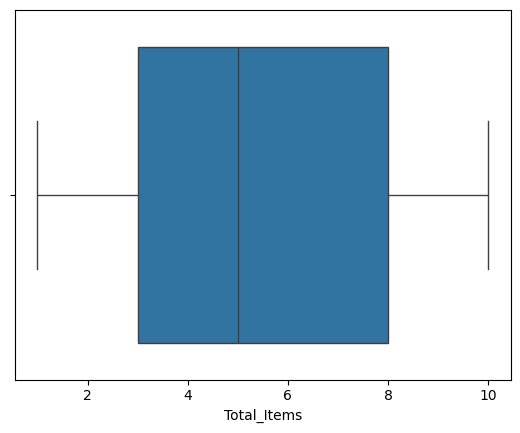

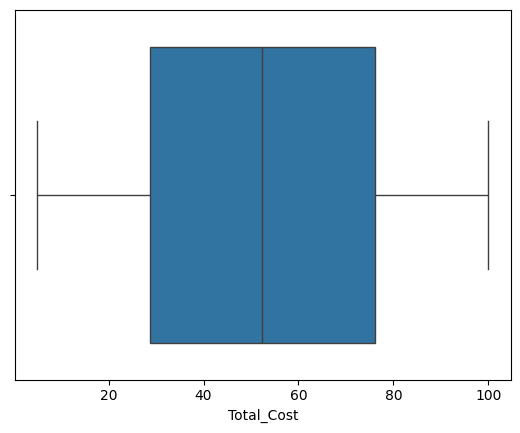

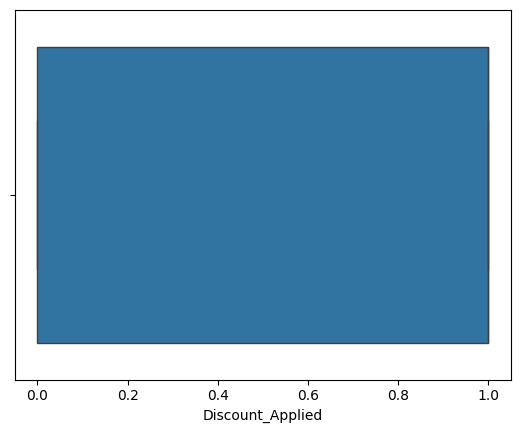

In [16]:
# detecting outlier
for i in df_num:
    sns.boxplot(data=df_num, x=i)
    plt.show()

>Based on the boxplot above, this dataset has no outler values at all.

In [17]:
# function to find outliers using numpy
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q2 = np.quantile(data, .50)
    Q3 = np.quantile(data, .75)

    IQR = (Q3 - Q1) * 1.5
    lower_limit = Q1 - IQR
    upper_limit = Q3 + IQR

    outlier = ''
    for i in range(len(data)):
        if data[i] > upper_limit:
            outlier = outlier + str(data[i]) + ', '
        elif data[i] < lower_limit:
            outlier = outlier + str(data[i]) + ', '
    return outlier

In [18]:
# detect outlier from each column usinng loop
for i in df_num:
    print(f'Outlier Detected {i}:', (len(find_outlier(df_num[i].sort_values().values.tolist()))))

Outlier Detected Transaction_ID: 0
Outlier Detected Year: 0
Outlier Detected Total_Items: 0
Outlier Detected Total_Cost: 0
Outlier Detected Discount_Applied: 0


>We also tried to detect outliers using the Inter Quartile Range (IQR) method and found that there were no outliers.

### Step 3: Basic Data Analysis

In [19]:
# displays descriptive statistics of columns of numeric type
df.describe()

,Transaction_ID,Year,Total_Items,Total_Cost,Discount_Applied
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.000500e+09,2021.716168,5.495941,52.455220,0.500104
std,2.886753e+05,1.279786,2.871654,27.416989,0.500000
min,1.000000e+09,2020.000000,1.000000,5.000000,0.000000
25%,1.000250e+09,2021.000000,3.000000,28.710000,0.000000
50%,1.000500e+09,2022.000000,5.000000,52.420000,1.000000
75%,1.000750e+09,2023.000000,8.000000,76.190000,1.000000
max,1.001000e+09,2024.000000,10.000000,100.000000,1.000000


>The information above is a table about the descriptive statistics of each column of numeric type, namely Transaction_ID, Year, Total_Items, Total_Cost, Discount_Applied.
>1. The average transaction year is 2021.716168, which indicates that most transactions occurred in 2021 and 2022.
>2. The average number of items purchased per transaction is 5.495941. This means that, on average, each transaction involves the purchase of about 5-6 items.
>3. The average total cost per transaction is 52.455220. This gives an idea of the average value of each transaction.
>4. The average discount value applied was 0.500104. This indicates that about half of the transactions were discounted.
>5. The oldest transaction occurred in 2020. The transaction with the least number of items was 1 item. The transaction with the lowest cost was 5 (dollars). The minimum value for the discount is 0, which means that there are transactions that do not get a discount.
>6. The most recent transaction occurred in 2024. The transaction with the highest number of items is 10 items. The transaction with the highest cost is 100 (dollars). The maximum value for discount is 1, which means there are transactions that get full discount.

In [20]:
# Display descriptive statistics of type object
df.describe(include='object')

,Customer_Name,Product,Payment_Method,City,Store_Type,Customer_Category,Season,Promotion
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,329738,571947,4,10,6,8,4,3
top,Michael Smith,['Toothpaste'],Cash,Boston,Supermarket,Senior Citizen,Spring,No Promotion
freq,454,4893,250230,100566,166936,125485,250368,333943


> The information above is a table about the descriptive statistics of each column of numeric type, namely Customer_Name, Product, Payment_Method, City, Stored_Type, Customer_Category, Season, and Promotion. 
> 1. The total amount of data or observations in the dataset. In this case, there are 1,000,000 transactions analyzed. This means there are 1 million rows of data containing information about each transaction.
> 2. There is a unique amount of data in each column but the number is not equal to the number of rows of data. this indicates that there are repeated unique values in one column.
>3. The customer with the name “Michael Smith” is the one who makes the most transactions. The product “Toothpaste” is the most frequently purchased product.  The most commonly used payment method is “Cash”. The city of “Boston” is the location of the most frequent transactions. “Supermarket” is the most common store type. “Senior Citizen” was the customer category that made the most transactions. “Spring” season is the season with the most transactions. and ‘No Promotion’ indicates that most transactions did not use promotions.

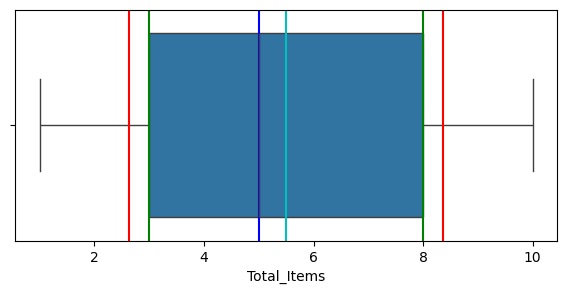

In [21]:
# plotting box plot for Total Items
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Total_Items'])
plt.axvline(df['Total_Items'].quantile(0.25), color='g') # Q1
plt.axvline(df['Total_Items'].quantile(0.75), color='g') # Q3
plt.axvline(df['Total_Items'].mean() - df['Total_Items'].std(), color='r') 
plt.axvline(df['Total_Items'].mean() + df['Total_Items'].std(), color='r') 
plt.axvline(df['Total_Items'].median(), color='b')
plt.axvline(df['Total_Items'].mean(), color='c')
plt.show()

> From the Boxplot visualization above the cyan colored line is the mean and dark blue is the median. This indicates that the distribution is Positive Skew. 

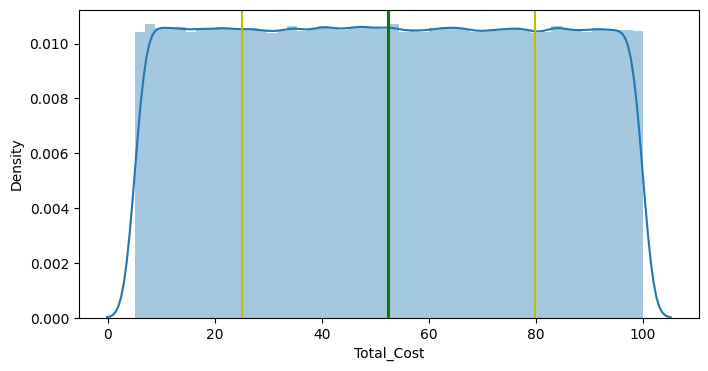

In [22]:
# plot distribution 
plt.figure(figsize=(8,4))
sns.distplot(df['Total_Cost'])
plt.axvline(df['Total_Cost'].mean(), color ='r')
plt.axvline(df['Total_Cost'].median(), color ='g')
plt.axvline(df['Total_Cost'].mean() - df['Total_Cost'].std(), color ='y')
plt.axvline(df['Total_Cost'].mean() + df['Total_Cost'].std(), color ='y')
plt.show()

> Based on the plot above, the red and green lines overlap, indicating the mean and median are equal, which means the data is normally distributed.

In [25]:
variance_transaction_id = df['Transaction_ID'].var()

std_transaction_id = df['Transaction_ID'].std()

transaction_id_range = df['Transaction_ID'].max() - df['Transaction_ID'].min()

print('Variance Transaction ID: ', variance_transaction_id)
print('Standard Deviation Transaction ID: ', std_transaction_id)
print('Price Range: ', transaction_id_range)

Variance Transaction ID:  83333416666.66667
Standard Deviation Transaction ID:  288675.2789323441
Price Range:  999999


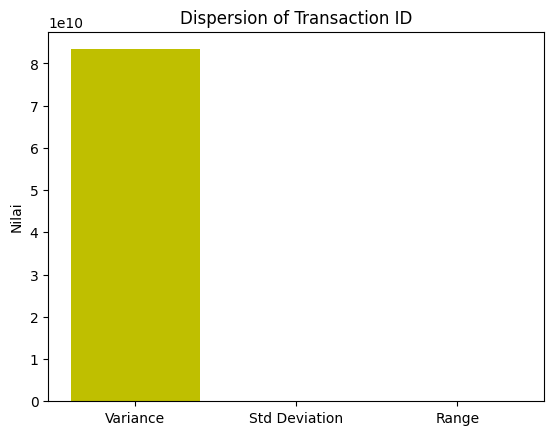

In [26]:
plt.bar(['Variance','Std Deviation', 'Range'],
        [variance_transaction_id,std_transaction_id,transaction_id_range],
        color=['y','g','b'])
plt.ylabel('Nilai')
plt.title('Dispersion of Transaction ID')
plt.show()

In [27]:
variance_total_items = df['Total_Items'].var()

std_total_items = df['Total_Items'].std()

total_items_range = df['Total_Items'].max() - df['Total_Items'].min()

print('Variance Total Items: ', variance_total_items)
print('Standard Deviation Total Items: ', std_total_items)
print('Total Items Range: ', total_items_range)

Variance Total Items:  8.246397770916772
Standard Deviation Total Items:  2.8716541872093115
Total Items Range:  9


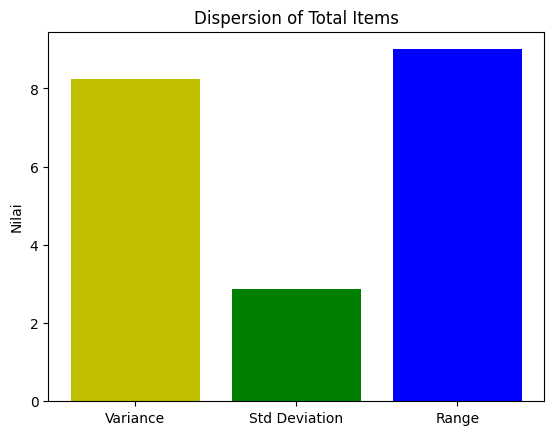

In [28]:
plt.bar(['Variance','Std Deviation', 'Range'],
        [variance_total_items,std_total_items,total_items_range],
        color=['y','g','b'])
plt.ylabel('Nilai')
plt.title('Dispersion of Total Items')
plt.show()

In [29]:
variance_total_cost = df['Total_Cost'].var()

std_total_cost = df['Total_Cost'].std()

total_cost_range = df['Total_Cost'].max() - df['Total_Cost'].min()

print('Variance Total Cost: ', variance_total_cost)
print('Standard Deviation Total Cost: ', std_total_cost)
print('Total Cost Range: ', total_cost_range)

Variance Total Cost:  751.6912937953173
Standard Deviation Total Cost:  27.416989145333176
Total Cost Range:  95.0


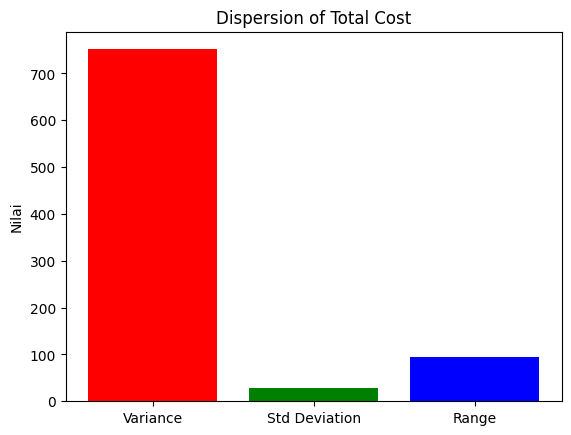

In [30]:
plt.bar(['Variance','Std Deviation', 'Range'],
        [variance_total_cost,std_total_cost,total_cost_range],
        color=['r','g','b'])
plt.ylabel('Nilai')
plt.title('Dispersion of Total Cost')
plt.show()

In [31]:
variance_discount_applied = df['Discount_Applied'].var()

std_discount_Applied = df['Discount_Applied'].std()

total_discount_applied = df['Discount_Applied'].max() - df['Discount_Applied'].min()

print('Variance Discount Applied: ', variance_discount_applied)
print('Standard Deviation Discount Applied: ', std_discount_Applied)
print('Discount Applied Range: ', total_discount_applied)

Variance Discount Applied:  0.2500002391842392
Standard Deviation Discount Applied:  0.500000239184182
Discount Applied Range:  1


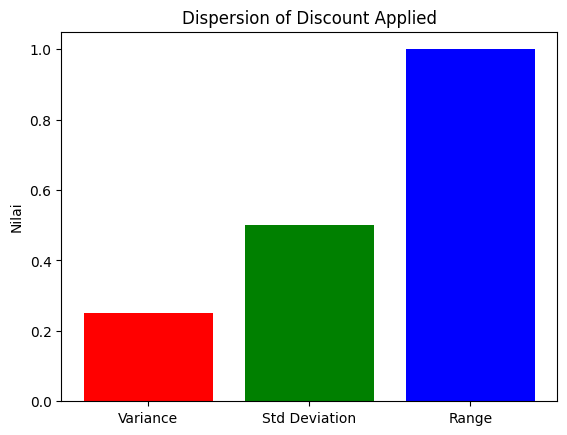

In [32]:
plt.bar(['Variance','Std Deviation', 'Range'],
        [variance_discount_applied,std_discount_Applied,total_discount_applied],
        color=['r','g','b'])
plt.ylabel('Nilai')
plt.title('Dispersion of Discount Applied')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Year               1000000 non-null  int32  
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  int32  
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          1000000 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(8)
memory usage: 91.6+ MB


#### SUMMARY

In [34]:
# top 10 customer yang melakukan transaksi terbanyak
top_customer = df.groupby('Customer_Name')['Transaction_ID'].count().sort_values(ascending=False).head(10)
top_customer 

Customer_Name
Michael Smith        454
Michael Johnson      341
James Smith          337
David Smith          309
Michael Williams     304
Christopher Smith    301
John Smith           288
Michael Jones        285
Robert Smith         275
Michael Brown        274
Name: Transaction_ID, dtype: int64

In [55]:
# top 10 customer yang melakukan transaksi sedikit
top_customer = df.groupby('Customer_Name')['Transaction_ID'].count().sort_values(ascending=True).head(10)
top_customer 

Customer_Name
Zoe York            1
Isaac Combs         1
Isaac Contreras     1
Isaac Cook          1
Neil Hernandez      1
Isaac Cox           1
Neil Hayes          1
Isaac Cunningham    1
Isaac Davidson      1
Neil Harrell        1
Name: Transaction_ID, dtype: int64

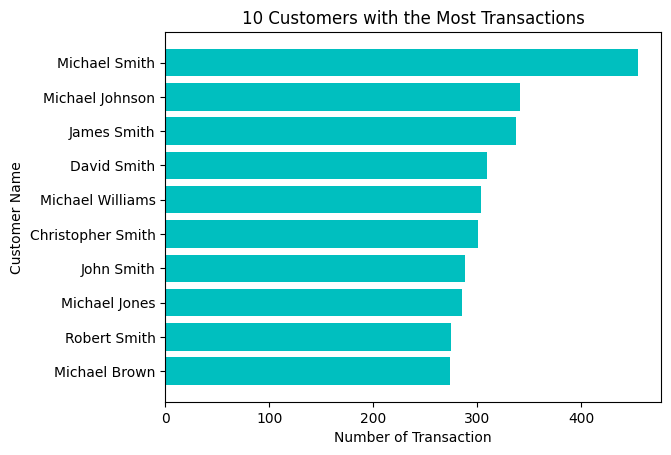

In [35]:
# Mengubah urutan menjadi descending pada plot
top_customer = top_customer.iloc[::-1]

# Membuat bar plot
plt.barh(top_customer.index, top_customer.values, color='c')

# Memberikan judul dan label sumbu
plt.title("10 Customers with the Most Transactions")
plt.ylabel("Customer Name")
plt.xlabel("Number of Transaction")

# Menampilkan plot
plt.show()

> From the data above, it can be seen that the customer named Michael Smith is the customer who makes the most transactions, with a total of 454 transactions. While there are quite a lot of customers who make few transactions. Retail stores can provide discount coupons for Michael Smith and 9 other customers so that they remain loyal to the services provided.

In [47]:
# persentase transaksi per musim
# top 10 customer yang melakukan transaksi terbanyak
transaction_season = df.groupby('Season')['Transaction_ID'].count().sort_values(ascending=False).head(10)

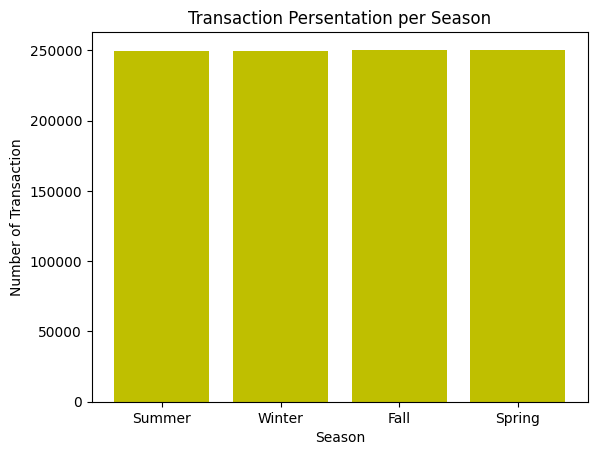

In [51]:
# Mengubah urutan menjadi descending pada plot
transaction_season = transaction_season.iloc[::-1]

# Membuat bar plot
plt.bar(transaction_season.index, transaction_season.values, color='y')

# Memberikan judul dan label sumbu
plt.title("Transaction Persentation per Season")
plt.ylabel("Number of Transaction")
plt.xlabel("Season")

# Menampilkan plot
plt.show()

>There is no significant difference in the number of transactions in each season. However, summer is the season that has the highest number of transactions. This can be a decision for retail stores that they should still stock products in every season for sale.

In [38]:
# Kombinasi frekuensi kota dan jenis toko
city_store_revenue = df.groupby(['City', 'Store_Type'])['Total_Cost'].sum().reset_index(name='Count')

print("Frekuensi kombinasi kota dan jenis toko:")
print(city_store_revenue)


Frekuensi kombinasi kota dan jenis toko:
             City         Store_Type      Count
0         Atlanta  Convenience Store  867963.02
1         Atlanta   Department Store  867943.81
2         Atlanta           Pharmacy  859940.52
3         Atlanta    Specialty Store  866083.77
4         Atlanta        Supermarket  865390.13
5         Atlanta     Warehouse Club  875410.59
6          Boston  Convenience Store  859721.81
7          Boston   Department Store  884090.59
8          Boston           Pharmacy  890450.14
9          Boston    Specialty Store  876681.56
10         Boston        Supermarket  880596.32
11         Boston     Warehouse Club  871767.54
12        Chicago  Convenience Store  883270.97
13        Chicago   Department Store  861565.49
14        Chicago           Pharmacy  869663.03
15        Chicago    Specialty Store  881737.22
16        Chicago        Supermarket  885849.96
17        Chicago     Warehouse Club  881100.78
18         Dallas  Convenience Store  879453.95

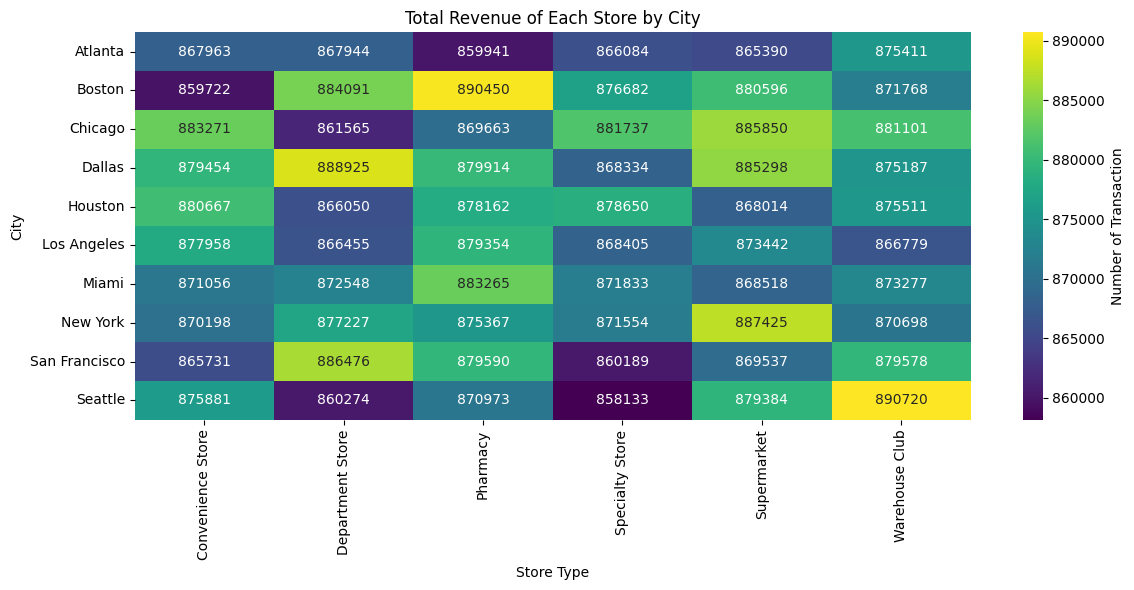

In [39]:
plt.figure(figsize=(12, 6))
# Changed code: using keyword arguments instead of positional arguments
city_store_pivot = city_store_revenue.pivot(index="City", columns="Store_Type", values="Count").fillna(0)
sns.heatmap(city_store_pivot, annot=True, fmt="g", cmap="viridis", cbar_kws={'label': 'Number of Transaction'})

# Menambahkan judul dan label
plt.title("Total Revenue of Each Store by City")
plt.xlabel("Store Type")
plt.ylabel("City")
plt.tight_layout()
plt.show()

> From the visualization above in the form of a Heatmap, we can find out what Store Type data gets the most profit from each city. Store Types that get high profits are marked with a solid yellow color and Store Types that get the lowest profits are marked with a solid purple color. The Warehouse Club type store in the city of Seattle has the highest profit of 890,720.00 dollars. While the Speciality Store Type Store in the same city became the least profitable store at 858,133.00 dollars.  

In [41]:
# tren payment method setiap tahunnya
count_transaction = df.groupby('Year')['Transaction_ID'].count().reset_index()
count_transaction

,Year,Transaction_ID
0,2020,228707
1,2021,228298
2,2022,227818
3,2023,228474
4,2024,86703


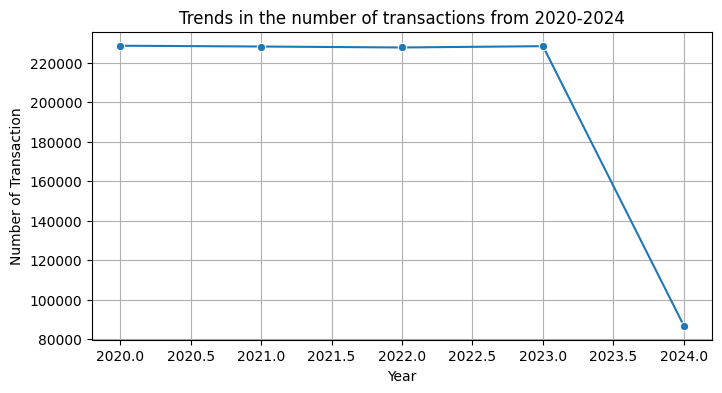

In [42]:
# visualisasi trend transaksi dari tahun 2020 ke 2024
plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='Transaction_ID', data = count_transaction, marker='o')
plt.title('Trends in the number of transactions from 2020-2024')
plt.xlabel('Year')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

> From the Linechart above, sales/transaction data from 2020 to 2023 did not experience significant changes (profit/loss). However, in 2024 the number of transactions is still below 100,000 transactions, this is still not certain of the final result because this year's data has not been recapitulated as a whole in one year. This can be done by retailers to attract customers so that the loss is not too significant from last year.

### Step 4: Exporting the Cleaned Data

In [43]:
df.to_csv('Result/Retail_Transaction_Cleaned.csv')